In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data preparation and cleaning
**1)Load the file using Pandas.**

**2)Look at some information about the data & the columns**

**3)Fix any missing or incorrect values**

In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv("/kaggle/input/us-accidents/US_Accidents_Dec20_Updated.csv")

**The power of pandas..! It took just 30 to 40 secs to load all 3 million records.If it was on excel we would definately have hard time on reading it.**

In [ ]:
df

**We learn:**

There are 2906610 rows and 47 columns

**Note from my side:**

Let's imagine your manager/supervisor has given you this dataset.it's a good practice to know the columns and it's information.(The information is given to us since this is a kaggle dataset but it won't always be the case.)

In [ ]:
df.columns

The above is the columns that we are working with.

In [ ]:
df.info()

**We learn:**

**There are following types:**

1)float

2)int

3)bool 

4)object

Memory usage is around 790 MB

**Let's try to get info regarding each numerical column.**

In [ ]:
df.describe()

# My view:

**Look at temp column.The accident occur on Max temperature of 61 fahrenheit and min is -8 fahrenheit.Let's try to understand in which area (warmer or colder) accidents occur the most.**

**But first we need to know how many numerical columns are there.**

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

We have 14 numerical columns

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)

In [ ]:
missing_percentage=total/len(df)
missing_percentage

**Let's plot the missing percentage.For better view.since we have one column of data in missing percentage it is a series not a dataframe**

In [ ]:
type(missing_percentage)

Hence the proof that it is a series.[Series is one column from a dataframe]

In [ ]:
missing_percentage[missing_percentage!=0].plot(kind='barh')

It's a good idea to drop the columns which are missing more than half of the times like number, precipitation etc.For now i'll keep them around,drop them later if not needed

In [ ]:
df.info()

# **Exploratory data analysis**

In [ ]:
import seaborn as sns
import matplotlib as plt

In [ ]:
# Map of accidents, color code by county

sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df, hue='County', legend=False, s=20)

# Exploring cities
**Let's try to find out the number of unique cities in the dataset.**

In [ ]:
cities=df.City.unique()
len(cities)

**There are around 11790 uniqie cities.it's impossible to look at all the cities,so i will try to look the cities with highest number accidents**

In [ ]:
# use value counts to find the unique occurences
cities_by_accidents=df.City.value_counts()
cities_by_accidents

**Los Angles has highest number of accidents followed by houston etc.let's look at population,but it's not in the dataset.let's search in wiki**

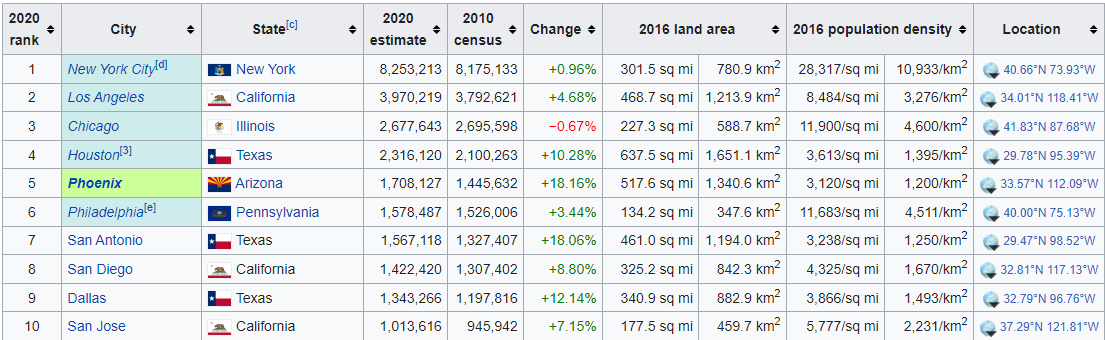.
**This is intersting since new york is at top.let's investigate**

In [ ]:
cities_by_accidents[:10]

# We learn:
**New york is in the most populated city,but it doesn't even crack top 10 in accidents.let's see the number of accidents in new york**

In [ ]:
'NY' in df.State

**New york is missing from the dataset.**

# Note from my side:
**It's important to find these kind of anomolies.For ex:imgine if you are given the task of data analysis in your company.And miss this and made assumption like "population is not responsible for number of accidents",lot of this might go wrong.Since the decision is made based on analysis.It's better to mention the data doesn't contain new york in the beginning of analysis.**

In [ ]:
cities_by_accidents[:20].plot(kind='barh')

**Let's to understand the distribution of accidents on cities.**

In [ ]:
sns.distplot(cities_by_accidents)

**Most of the cities has very few accidents less than 2000**

In [ ]:
high_accident_cities=cities_by_accidents[cities_by_accidents>1000]
len(high_accident_cities)/len(cities)

**Less than 5% of cities has more than 1000 accidents**

In [ ]:
sns.distplot(high_accident_cities)

**The distribution of accidents on cities(higher end) is exponentially decreasing.**

In [ ]:
low_accident_cities=cities_by_accidents[cities_by_accidents<=1000]
len(low_accident_cities)

**11276 has less than 1000 accidents**

In [ ]:
sns.distplot(low_accident_cities)

**Seems like the cities are following exponential distribution**

In [ ]:
sns.histplot(cities_by_accidents,log_scale=True)

# We learn:
**Major chunk of the cities falls between 0 to 100 accidents.But we can see that large number of cities(Around 1200+) falls around 1 or 2.**

**It could be a outlier or data could be simply missing.**

# Start time

In [ ]:
df.Start_Time

In [ ]:
df.Start_Time[0]

**This is a string.let's convert it into date time.**

In [ ]:
pd.to_datetime(df.Start_Time)

**Converted to date time.**